In [22]:
from pathlib import Path
import requests
import numpy as np
from matplotlib.pyplot import *

DATA_PATH = Path("../data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents = True, exist_ok = True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

In [23]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

In [24]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((50000, 784), (50000,), (10000, 784), (10000,))

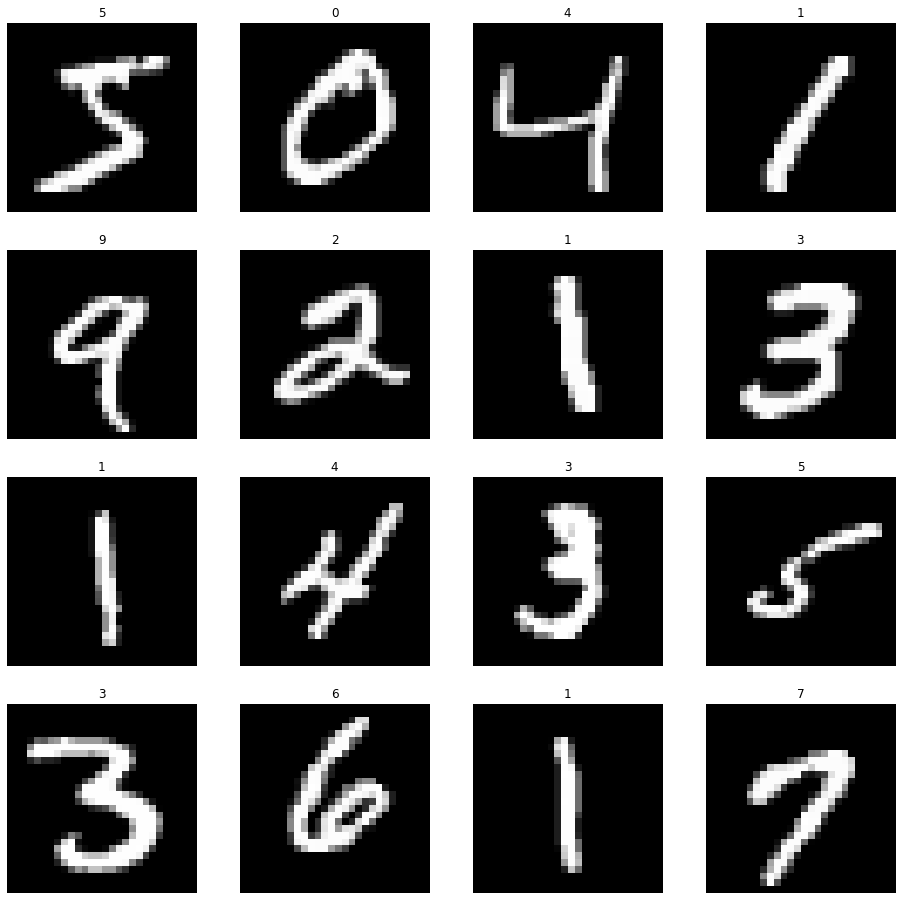

In [26]:
fig = figure(0, (16, 16))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    imshow(x_train[i, :].reshape(28,28), cmap = 'gray') 
    title(str(y_train[i])); axis('off')

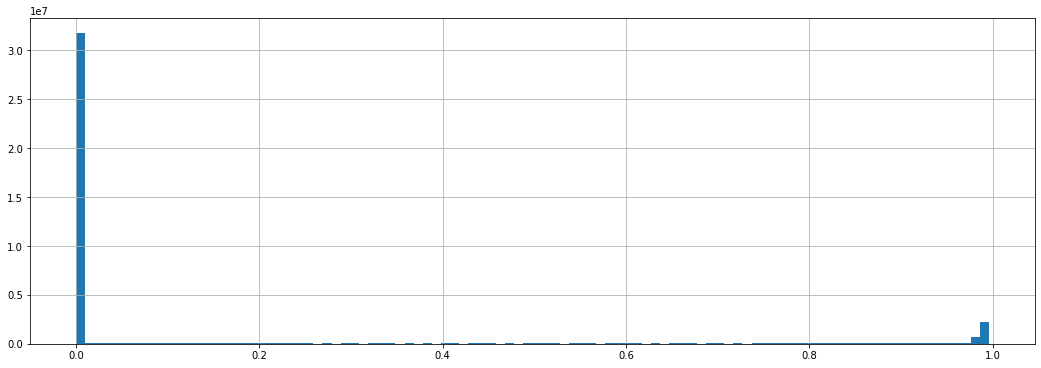

In [28]:
fig = figure(0, (18, 6))
hist(x_train.ravel(), 100);grid(1)

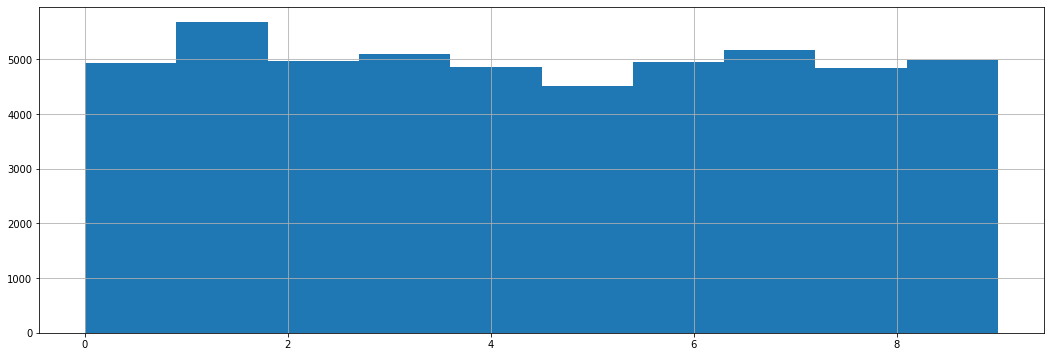

In [37]:
fig = figure(0, (18, 6))
hist(y_train.ravel(), 10); grid(1)

In [38]:
import torch 
from torch.utils.data import DataLoader, TensorDataset

train_ds = TensorDataset(torch.tensor(x_train, dtype = torch.float),
                        torch.tensor(y_train, dtype = torch.float))
train_dl = DataLoader(train_ds, batch_size=64, shuffle = True,
                     num_workers = 4, drop_last = True)

In [41]:
valid_ds = TensorDataset(torch.tensor(x_valid, dtype = torch.float),
                        torch.tensor(y_valid, dtype = torch.float))
valid_dl = DataLoader(valid_ds, batch_size=64, shuffle = True, 
                      num_workers = 4, drop_last = True)

In [42]:
from torch import nn
from torch import optim
from tqdm import tqdm

In [45]:
model = nn.Sequential(nn.Linear(784, 64),
                     nn.Sigmoid(),
                     nn.Linear(64,1))

In [46]:
num_epochs = 2
lr = 1e-5; losses = [] #Error seems to explode for larger learning phases

opt = optim.SGD(model.parameters(), lr = lr)
for i in range(num_epochs):
    for x, y in tqdm(train_dl):
        yhat = model(x) 
        loss = torch.sum(0.5 * (y - yhat) **2)
        loss.backward()
        
        opt.step()
        opt.zero_grad()
        losses.append(loss.item())

100%|██████████| 781/781 [00:01<00:00, 450.03it/s]


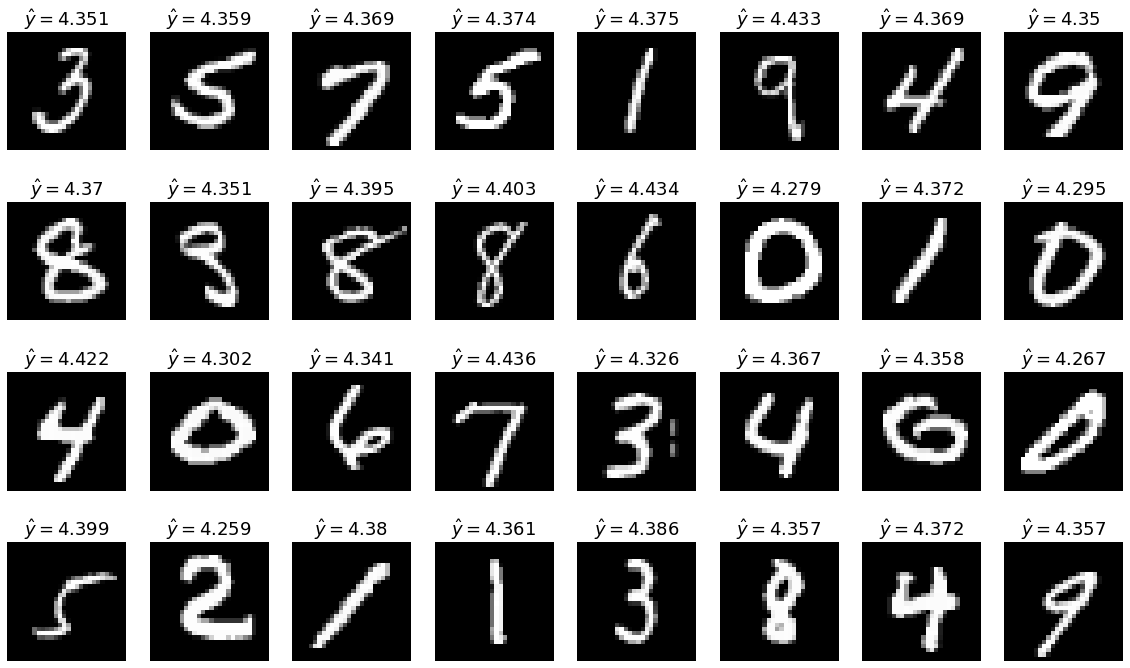

In [48]:
x, y = next(iter(valid_dl)) #Grab validation minibatch

model.eval() 
yhat = model(x)

fig = figure(0, (20, 12))
for i in range(32):
    fig.add_subplot(4, 8, i+1)
    imshow(x[i, :].reshape(28, 28), cmap = 'gray')
    title('$\hat{y} = $' + str(round(yhat[i].item(),
                                    3)), fontsize = 18); axis('off')

In [49]:
import torch.nn.functional as F

In [51]:
x, y = next(iter(train_dl))
y_one_hot = F.one_hot(y.long(), num_classes = 10)

In [59]:
y_one_hot[:5, :]

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [62]:
model = nn.Sequential(nn.Linear(784, 64),
                     nn.Sigmoid(),
                     nn.Linear(64, 10),
                     nn.Sigmoid()) #Predict valuse between 0 and 1

In [67]:
num_epochs = 25; lr = 1e-3; losses = []

opt = optim.SGD(model.parameters(), lr = lr) 

for i in range(num_epochs):
    for x, y in tqdm(train_dl):
        yhat = model(x)
        y_one_hot = F.one_hot(y.long(), num_classes = 10)
        
        loss = torch.sum(0.5* (y_one_hot.float()-yhat)**2)
        
        loss.backward()
        
        opt.step()
        opt.zero_grad()
        losses.append(loss.item())

100%|██████████| 781/781 [00:01<00:00, 437.58it/s]


Text(0, 0.5, 'loss')

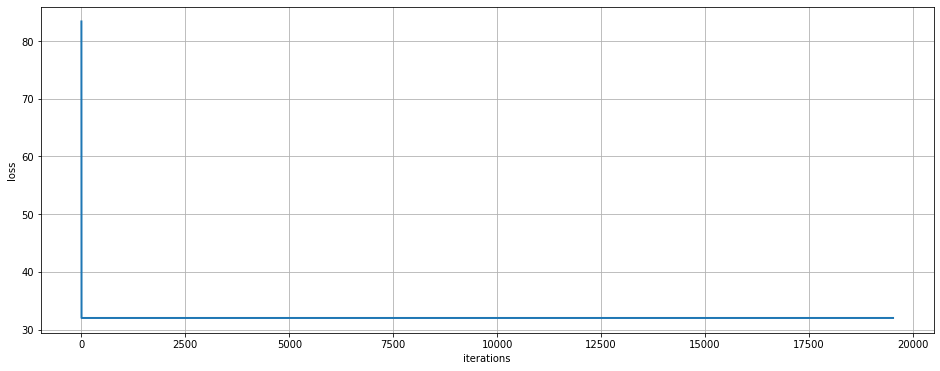

In [72]:
fig = figure(0, (16, 6))
plot(losses, linewidth =2); grid(1); xlabel('iterations');ylabel('loss')